In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import quad
from scipy.fft import fft, ifft, fftfreq
import scipy

# 1.

In [2]:
def get_cos_singal(f=[50,150,450], fs=10000, A=2.0, a=-1, b=1, noise=None):
    t = np.linspace(a, b, fs)
    omegas = [2 * np.pi * f_curr for f_curr in f]
    x_cos = np.sum([A * np.cos(omega * t) for omega in omegas], axis=0)
    if noise:
        for i in range(len(x_cos)):
            x_cos[i] += (np.random.rand() * noise)
    return x_cos

In [3]:
def get_impulse(a=0.0, b=20.0, A=1, period=7.5, fc = 10_000, noise=None):
    t = np.linspace(a, b, fc)
    signal = np.array([(A if ti % (period * 2) >= period else 0) for ti in t])
    if noise:
        for i in range(len(signal)):
            signal[i] += (np.random.rand() * noise)
    return t, signal

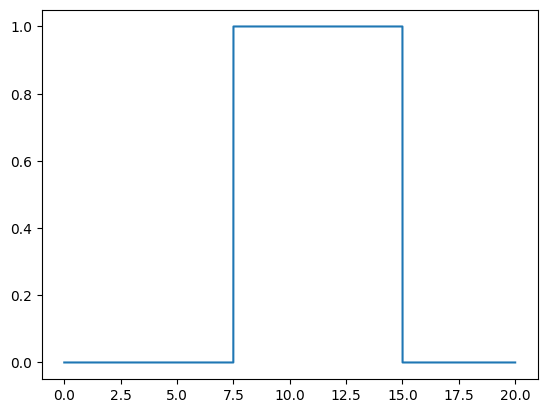

In [4]:
a = 0
b = 20
A = 1
period = 7.5
fc = 10_000

t, x_impuls = get_impulse(a=a, b=b, A=A, period=period, fc=fc)
plt.plot(t, x_impuls)

## a)

In [5]:
def get_kernel(a, b, fc, A):
    t = np.linspace(a, b, fc)
    return A * np.exp(-t**2)

In [6]:
kernel = get_kernel(a=a, b=b, fc=fc, A=A)
signal_with_kernel = np.convolve(x_impuls, kernel)[::2]

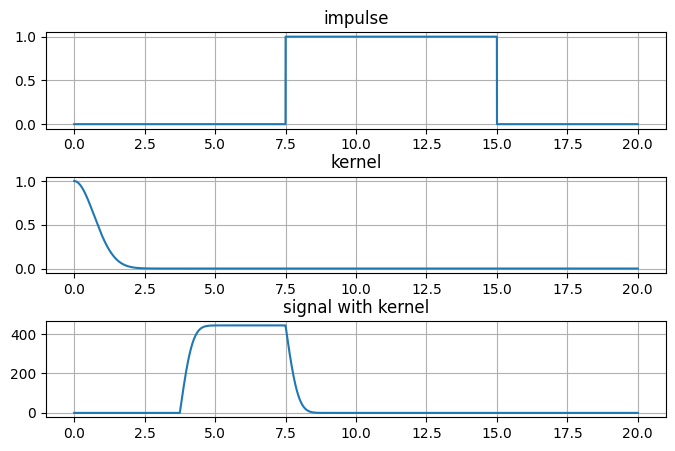

In [7]:
plt.figure(figsize=(8, 5))
plt.subplots_adjust(wspace=0.5, hspace=0.5)

plt.subplot(3, 1, 1)
plt.plot(t, x_impuls)
plt.title('impulse')
plt.grid(True)

plt.subplot(3, 1, 2)
plt.plot(t, kernel)
plt.title('kernel')
plt.grid(True)

plt.subplot(3, 1, 3)
plt.plot(t, signal_with_kernel)
plt.title('signal with kernel')
plt.grid(True)    

## b)

In [8]:
def get_linear(a, b, fc, A):
    t = np.linspace(a, b, fc)
    return np.array([x for x in t])

In [9]:
kernel = get_linear(a=a, b=b, fc=fc, A=A)
signal_with_kernel_linear = np.convolve(x_impuls, kernel)[::2]

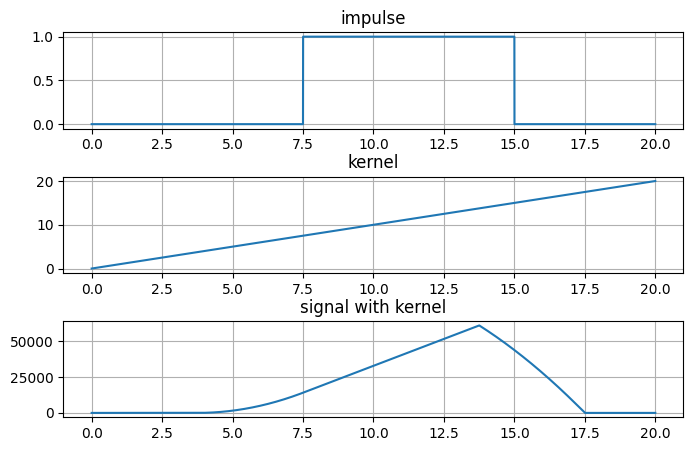

In [10]:
plt.figure(figsize=(8, 5))
plt.subplots_adjust(wspace=0.5, hspace=0.5)

plt.subplot(3, 1, 1)
plt.plot(t, x_impuls)
plt.title('impulse')
plt.grid(True)

plt.subplot(3, 1, 2)
plt.plot(t, kernel)
plt.title('kernel')
plt.grid(True)

plt.subplot(3, 1, 3)
plt.plot(t, signal_with_kernel_linear)
plt.title('signal with kernel')
plt.grid(True)    

# 2.

In [11]:
def my_convolve(signal, kernel):
    signal_len = len(signal)
    kernel_len = len(kernel)
    conv_len = signal_len + kernel_len - 1
    result = np.zeros(conv_len)

    for i in range(conv_len):
        for j in range(kernel_len):
            if i - j >= 0 and i - j < signal_len:
                result[i] += signal[i - j] * kernel[j]
    return result

In [12]:
t_my, x_impulse_my = get_impulse(a=a, b=b, A=A, period=period, fc=fc//100)
kernel = get_kernel(a=a, b=b, fc=fc//100, A=A)
signal_with_my_kernel = my_convolve(x_impulse_my, kernel)[::2]

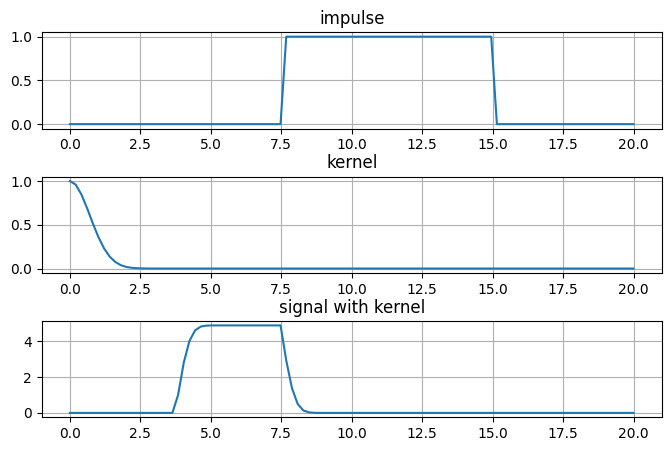

In [13]:
plt.figure(figsize=(8, 5))
plt.subplots_adjust(wspace=0.5, hspace=0.5)

plt.subplot(3, 1, 1)
plt.plot(t_my, x_impulse_my)
plt.title('impulse')
plt.grid(True)

plt.subplot(3, 1, 2)
plt.plot(t_my, kernel)
plt.title('kernel')
plt.grid(True)

plt.subplot(3, 1, 3)
plt.plot(t_my, signal_with_my_kernel)
plt.title('signal with kernel')
plt.grid(True)

plt.show()

# 3.

In [14]:
t, x_impuls = get_impulse(a=a, b=b, A=A, period=period, fc=fc)
frequencies = fftfreq(len(x_impuls), d=t[1] - t[0])
kernel = get_kernel(a=a, b=b, fc=fc, A=A)

# Time-domain
signal_with_kernel = np.convolve(x_impuls, kernel)[::2]
signal_with_kernel_fft = np.pad(np.fft.fft(signal_with_kernel)[::2], (0, len(frequencies[:fc//2]) - len(np.fft.fft(signal_with_kernel)[::2])), mode='constant')

# Frequency-domain
x_impuls_fft = np.fft.fft(x_impuls)
kernel_fft = np.fft.fft(kernel)
multiply_fft = (x_impuls_fft * kernel_fft)
x_impulse_ifft = np.pad(np.fft.ifft(multiply_fft)[::2], (0, len(t)-len(multiply_fft[::2])), mode='constant')

c:\Users\Ivan K\AppData\Local\Programs\Python\Python312\Lib\site-packages\matplotlib\cbook.py:1762: ComplexWarning: Casting complex values to real discards the imaginary part
  return math.isfinite(val)
c:\Users\Ivan K\AppData\Local\Programs\Python\Python312\Lib\site-packages\matplotlib\cbook.py:1398: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


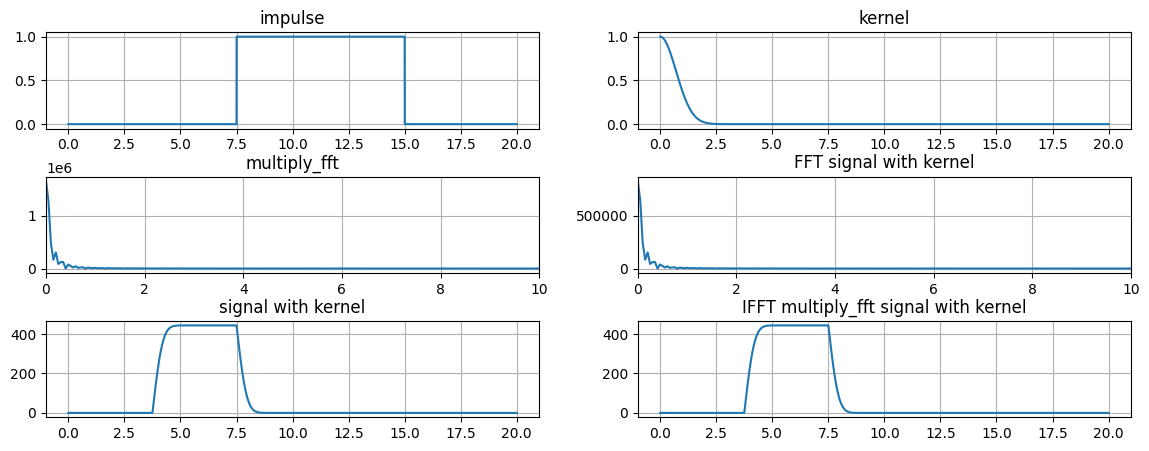

In [15]:
plt.figure(figsize=(14, 5))
plt.subplots_adjust(wspace=0.2, hspace=0.5)

plt.subplot(3, 2, 1)
plt.plot(t, x_impuls)
plt.title('impulse')
plt.grid(True)

plt.subplot(3, 2, 2)
plt.plot(t, kernel)
plt.title('kernel')
plt.grid(True)

plt.subplot(3, 2, 3)
plt.plot(frequencies[:fc//2], np.abs(multiply_fft[:fc//2]))
plt.xlim(0, 10)
plt.title('multiply_fft')
plt.grid(True)

plt.subplot(3, 2, 4)
plt.plot(frequencies[:fc//2], np.abs(signal_with_kernel_fft[:fc//2]))
plt.xlim(0, 10)
plt.title('FFT signal with kernel')
plt.grid(True)

plt.subplot(3, 2, 5)
plt.plot(t, signal_with_kernel)
plt.title('signal with kernel')
plt.grid(True)

plt.subplot(3, 2, 6)
plt.plot(t, x_impulse_ifft)
plt.title('IFFT multiply_fft signal with kernel')
plt.grid(True)

plt.show()

# 4.

In [16]:
def get_gause_kernel(t, a = 0.1):
    n = len(t)
    y = np.zeros(n)
    m = (n - 1) / 2
    for i in range(n):
        y[i] = np.exp(-0.5 * ((i - m) / (a * m)) ** 2)
    return y

In [17]:
def get_gause_kernel2(h, p, w):
    s = w * (2 * np.pi - 1) / (4 * np.pi)
    g = np.exp(-5 * ((h - p) / s) ** 2)
    return g

In [18]:
def my_conv(signal, core):
        c = np.ones(max(len(signal), len(core)))
        for i in range(len(c)):
            for k in range(len(core)):
                c[i] += signal[i - k] * core[k]
        return c / sum(core)

In [19]:
def core_of_gausse(x, alpha = 0):
        N = len(x)
        y = np.zeros(N)
        M = (N - 1) /2
        for k in range(N):
            y[k] = np.exp(-0.5 * ((k - M)/(alpha * M))**2)
        return y

1000 1000


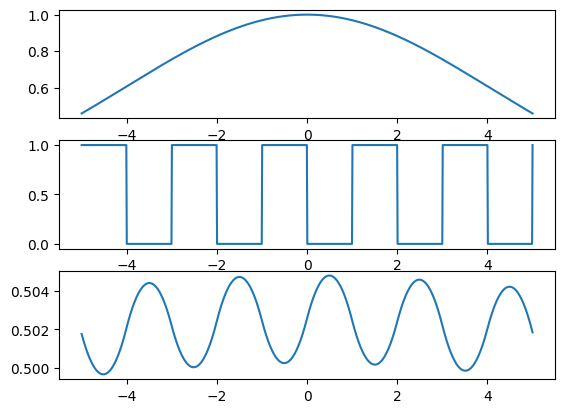

In [20]:
t = np.linspace(0, 1, 1000)
t2 = np.linspace(0, 1, 1999)
t, x_impuls = get_impulse(a=-5, b=5, period=1, fc=1000)
frequencies = fftfreq(len(x_impuls), d=t[1] - t[0])
#gaus = get_gause_kernel(t, a=0.01)
gaus = core_of_gausse(t, 0.8)

plt.subplot(3, 1, 1)
plt.plot(t, gaus)

plt.subplot(3, 1, 2)
plt.plot(t, x_impuls)
print(len(x_impuls), len(gaus))
plt.subplot(3, 1, 3)
#plt.plot(t, (x_impuls * gaus))
plt.plot(t, my_conv(x_impuls, gaus))

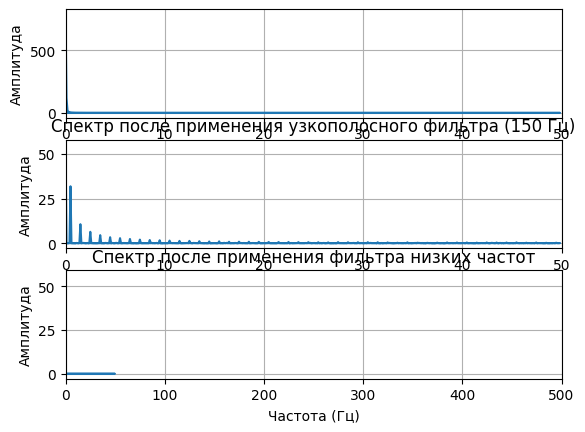

In [34]:
gaus_fft = np.fft.fft(gaus)
x_impuls_fft = np.fft.fft(x_impuls)
x_conv_fft = np.fft.fft(my_conv(x_impuls, gaus))
freqs = np.fft.fftfreq(len(t), d=t[1] - t[0])

plt.subplot(3, 1, 1)
plt.plot(freqs[:fc//2], np.abs(gaus_fft)[:fc//2], label='Оригинальный сигнал')
plt.xlim(0, 50)
plt.ylabel('Амплитуда')
plt.grid()

# Спектр после узкополосного фильтра
plt.subplot(3, 1, 2)
plt.plot(freqs[:fc//2], np.abs(x_impuls_fft)[:fc//2], label='После узкополосного фильтра (150 Гц)')
plt.title('Спектр после применения узкополосного фильтра (150 Гц)')
plt.xlabel('Частота (Гц)')
plt.xlim(0, 50)
plt.ylabel('Амплитуда')
plt.grid()

# Спектр после фильтра низких частот
plt.subplot(3, 1, 3)
plt.plot(freqs[:fc//2], np.abs(x_conv_fft)[:fc//2], label='После фильтра низких частот')
plt.title('Спектр после применения фильтра низких частот')
plt.xlabel('Частота (Гц)')
plt.xlim(0, 500)
plt.ylabel('Амплитуда')
plt.grid()

# 5.

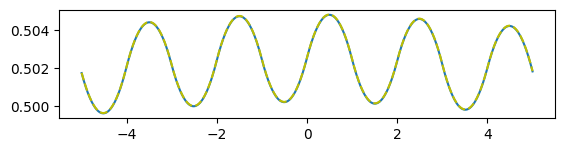

In [21]:
t, x_impuls = get_impulse(a=-5, b=5, period=1, fc=1000)
kernel = core_of_gausse(t, 0.8)
x_impuls_fft = np.fft.fft(x_impuls)
kernel_fft = np.fft.fft(kernel)
multiply_fft = (x_impuls_fft * kernel_fft)
x_impulse_ifft = np.fft.ifft(multiply_fft)
plt.subplot(3, 1, 1)
plt.plot(t, x_impulse_ifft/sum(kernel)+0.00125)
plt.plot(t, my_conv(x_impuls, gaus), '--y')
plt.show()

## a) b)

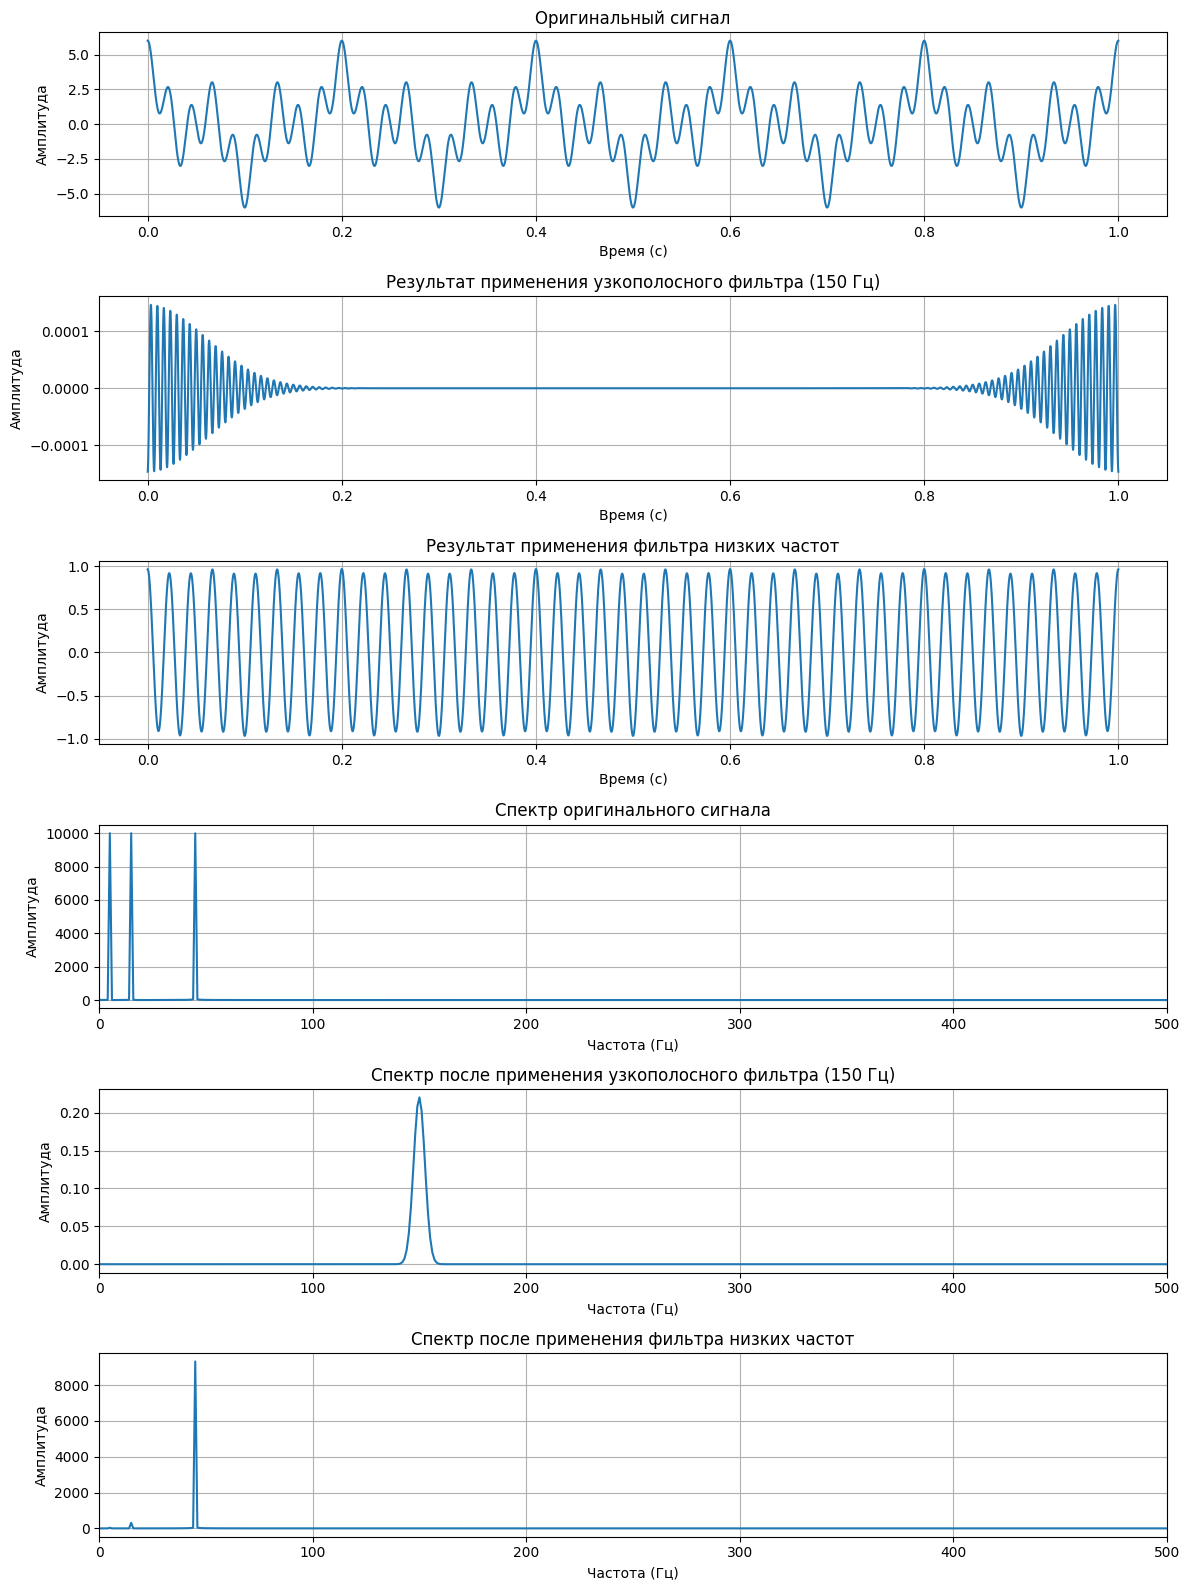

In [22]:
import numpy as np
import matplotlib.pyplot as plt

# Функция для создания Гауссового ядра
def gaussian_kernel(h, p, w):
    s = w * (2 * np.pi - 1) / (4 * np.pi)
    g = np.exp(-5 * ((h - p) / s) ** 2)
    return g

sampling_rate = 10000
t = np.linspace(0, 1, sampling_rate)
frequencies = [50, 150, 450]
signal = get_cos_singal(a=0.0, b=.1, fs=sampling_rate)

signal_fft = np.fft.fft(signal)
freqs = np.fft.fftfreq(len(t), 1 / sampling_rate)

p_narrow = 150
w_narrow = 20

p_low = 50
w_low = 100

kernel_narrow = gaussian_kernel(freqs, p_narrow, w_narrow)
kernel_low = gaussian_kernel(freqs, p_low, w_low)

# Применение фильтров в частотной области
filtered_fft_narrow = signal_fft * kernel_narrow
filtered_fft_low = signal_fft * kernel_low

# Преобразование обратно во временную область
filtered_signal_narrow = np.fft.ifft(filtered_fft_narrow).real
filtered_signal_low = np.fft.ifft(filtered_fft_low).real

plt.figure(figsize=(12, 16))

# Оригинальный сигнал
plt.subplot(6, 1, 1)
plt.plot(t, signal, label='Оригинальный сигнал')
plt.title('Оригинальный сигнал')
plt.xlabel('Время (с)')
plt.ylabel('Амплитуда')
plt.grid()

# Узкополосный фильтр
plt.subplot(6, 1, 2)
plt.plot(t, filtered_signal_narrow, label='Узкополосный фильтр (150 Гц)')
plt.title('Результат применения узкополосного фильтра (150 Гц)')
plt.xlabel('Время (с)')
plt.ylabel('Амплитуда')
plt.grid()

# Фильтр низких частот
plt.subplot(6, 1, 3)
plt.plot(t, filtered_signal_low, label='Фильтр низких частот')
plt.title('Результат применения фильтра низких частот')
plt.xlabel('Время (с)')
plt.ylabel('Амплитуда')
plt.grid()

# Спектр оригинального сигнала
plt.subplot(6, 1, 4)
plt.plot(freqs[:fc//2], np.abs(signal_fft)[:fc//2], label='Оригинальный сигнал')
plt.title('Спектр оригинального сигнала')
plt.xlabel('Частота (Гц)')
plt.xlim(0, 500)
plt.ylabel('Амплитуда')
plt.grid()

# Спектр после узкополосного фильтра
plt.subplot(6, 1, 5)
plt.plot(freqs[:fc//2], np.abs(filtered_fft_narrow)[:fc//2], label='После узкополосного фильтра (150 Гц)')
plt.title('Спектр после применения узкополосного фильтра (150 Гц)')
plt.xlabel('Частота (Гц)')
plt.xlim(0, 500)
plt.ylabel('Амплитуда')
plt.grid()

# Спектр после фильтра низких частот
plt.subplot(6, 1, 6)
plt.plot(freqs[:fc//2], np.abs(filtered_fft_low)[:fc//2], label='После фильтра низких частот')
plt.title('Спектр после применения фильтра низких частот')
plt.xlabel('Частота (Гц)')
plt.xlim(0, 500)
plt.ylabel('Амплитуда')
plt.grid()

plt.tight_layout()
plt.show()


# 6

In [23]:
def get_planck(N, epsilon):
    a = np.zeros(N)
    for k in range(N):
        if k == 0 or k == N - 1:
            a[k] = 0
        elif 0 < k < epsilon * (N - 1):
            z_a = epsilon * (N - 1) * (1 / k + 1 / (k - epsilon * (N - 1)))
            a[k] = 1 / (np.exp(z_a) + 1)
        elif epsilon * (N - 1) <= k <= (1 - epsilon) * (N - 1):
            a[k] = 1
        elif (1 - epsilon) * (N - 1) < k < N - 1:
            z_b = epsilon * (N - 1) * (1 / (N - 1 - k) + 1 / ((1 - epsilon) * (N - 1) - k))
            a[k] = 1 / (np.exp(z_b) + 1)
    return a

In [24]:
t, x_impuls = get_impulse(a=-5, b=5, period=1, fc=1000)

Уже и сдвинуть

C:\Users\Ivan K\AppData\Local\Temp\ipykernel_6472\1019571818.py:8: RuntimeWarning: overflow encountered in exp
  a[k] = 1 / (np.exp(z_a) + 1)
C:\Users\Ivan K\AppData\Local\Temp\ipykernel_6472\1019571818.py:13: RuntimeWarning: overflow encountered in exp
  a[k] = 1 / (np.exp(z_b) + 1)


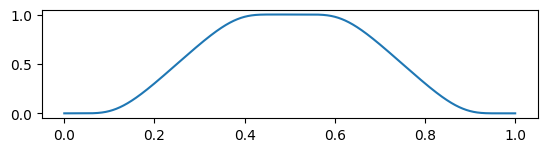

In [65]:
window = get_planck(N=len(t), epsilon=0.5)

plt.subplot(3, 1, 1)
plt.plot(t, window)

In [26]:
spectrum = np.fft.fft(x_impuls)
frequencies = np.fft.fftfreq(len(x_impuls), 1/fc)
filtered_signal_planck = my_conv(x_impuls, window)
filtered_spectrum_planck = np.fft.fft((filtered_signal_planck))

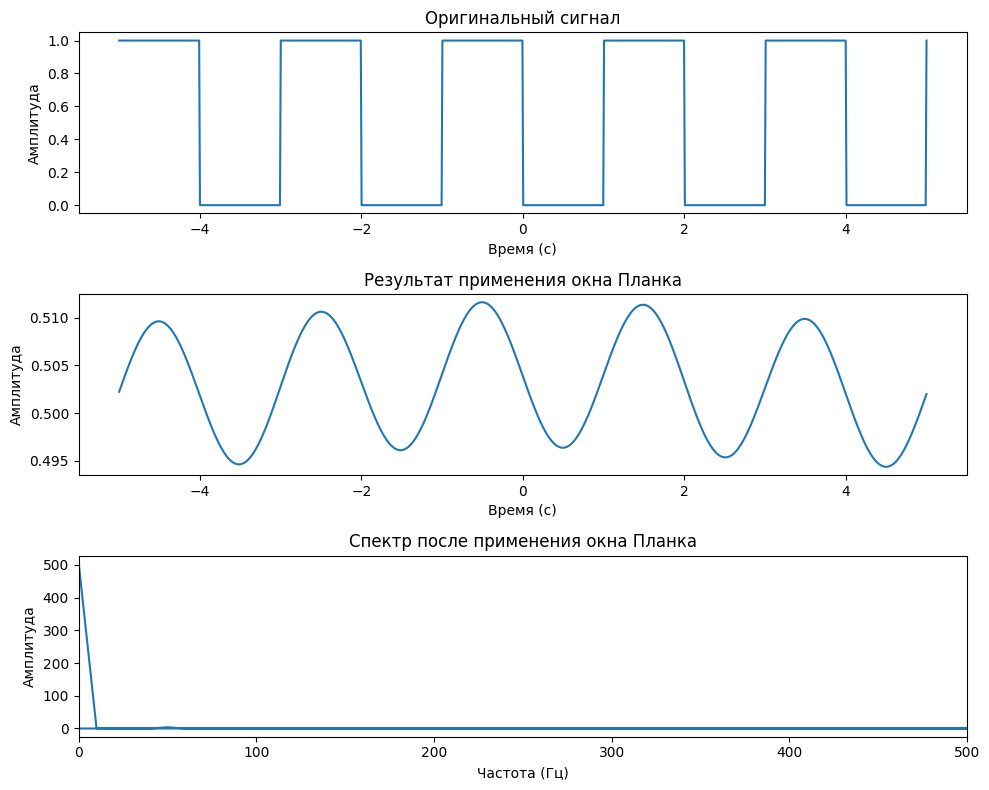

In [27]:
plt.figure(figsize=(10, 8))

# Оригинальный сигнал
plt.subplot(3, 1, 1)
plt.plot(t, x_impuls)
#plt.xlim(0, 0.1)
plt.title("Оригинальный сигнал")
plt.xlabel("Время (с)")
plt.ylabel("Амплитуда")

# Сигнал после применения окна Планка
plt.subplot(3, 1, 2)
plt.plot(t, np.real(filtered_signal_planck))
#plt.xlim(0, 0.1)
plt.title("Результат применения окна Планка")
plt.xlabel("Время (с)")
plt.ylabel("Амплитуда")

# Спектр после применения окна Планка
plt.subplot(3, 1, 3)
plt.plot(frequencies[:fc//2], np.abs(filtered_spectrum_planck)[:fc//2])
plt.title("Спектр после применения окна Планка")
plt.xlabel("Частота (Гц)")
plt.xlim(0, 500)
plt.ylabel("Амплитуда")

plt.tight_layout()
plt.show()

C:\Users\Ivan K\AppData\Local\Temp\ipykernel_6472\1019571818.py:8: RuntimeWarning: overflow encountered in exp
  a[k] = 1 / (np.exp(z_a) + 1)
C:\Users\Ivan K\AppData\Local\Temp\ipykernel_6472\1019571818.py:13: RuntimeWarning: overflow encountered in exp
  a[k] = 1 / (np.exp(z_b) + 1)


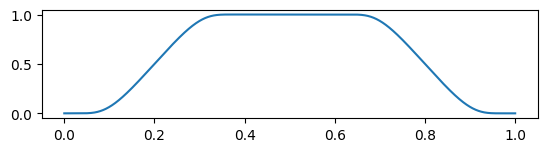

In [76]:
window = get_planck(N=len(t), epsilon=0.4)

plt.subplot(3, 1, 1)
plt.plot(t, window)

(0.0, 0.1)

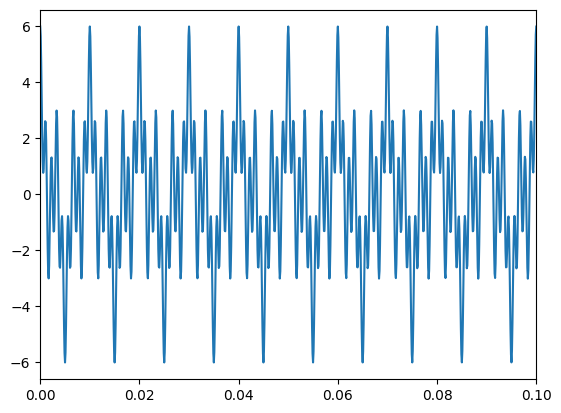

In [77]:
fc1=10000
t = np.linspace(0, 1, fc1)
x_signal = get_cos_singal(fs=fc1)
plt.plot(t, x_signal)
plt.xlim(0, 0.1)

C:\Users\Ivan K\AppData\Local\Temp\ipykernel_6472\1019571818.py:8: RuntimeWarning: overflow encountered in exp
  a[k] = 1 / (np.exp(z_a) + 1)


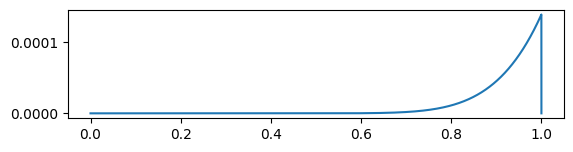

In [87]:
cutoff = 100
#window = get_planck(N=int(fc/cutoff), epsilon=0.1)
window = get_planck(N=len(t), epsilon=10)

plt.subplot(3, 1, 1)
plt.plot(t, window)

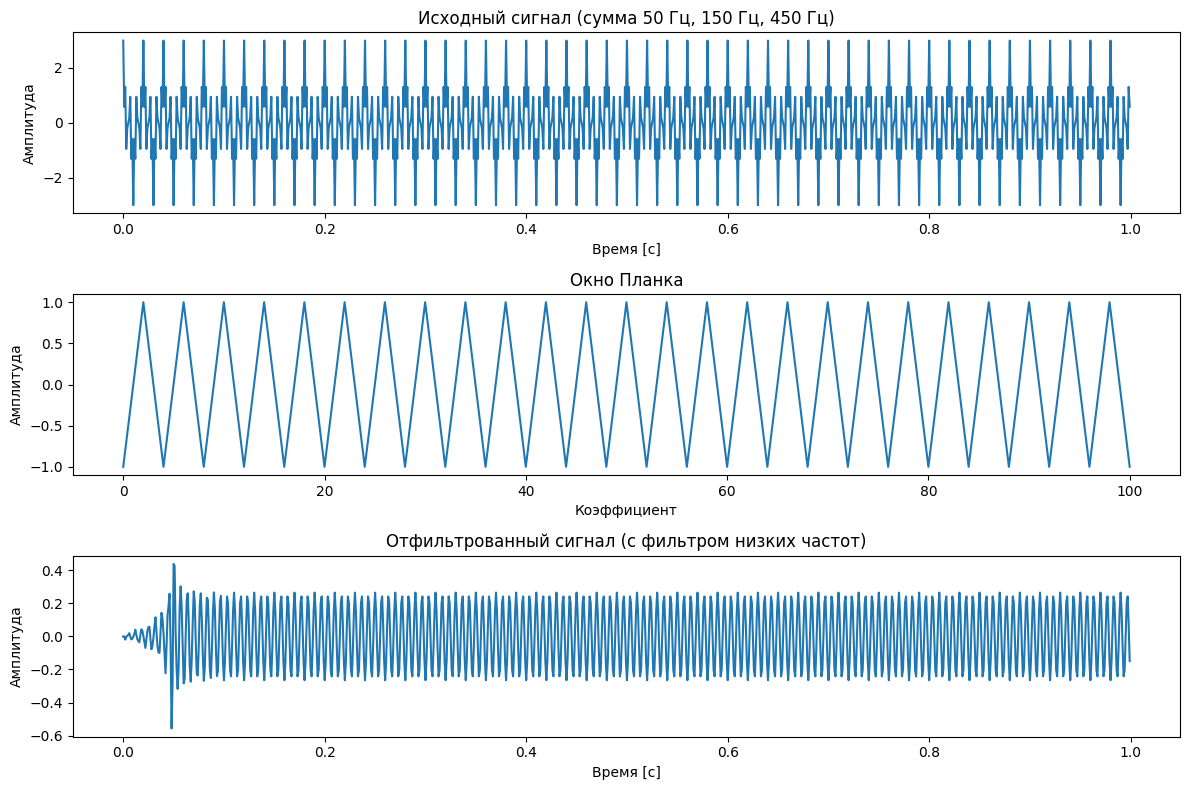

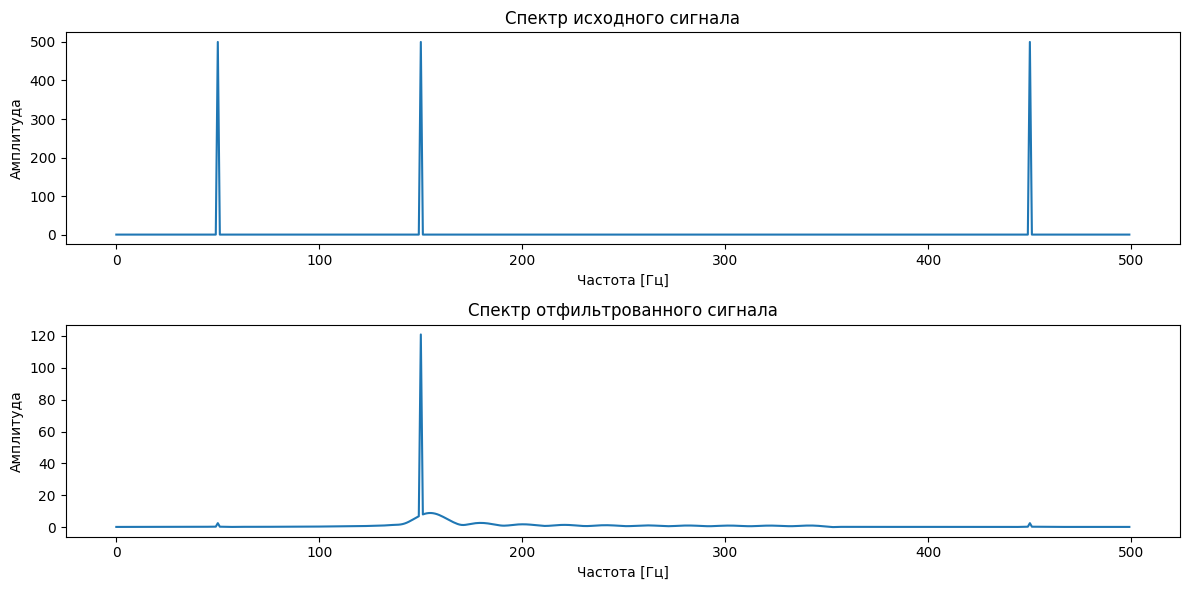

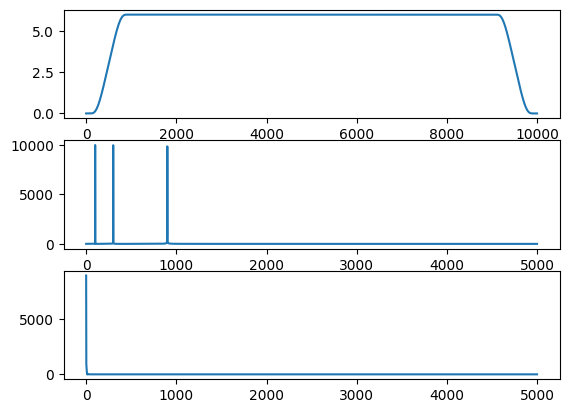

In [85]:
fft_signal = np.fft.fft(x_signal)
fft_freqs = np.fft.fftfreq(len(t), 1/fc)
fft_window = np.fft.fft(window)
filtred_fft_signal = fft_signal * fft_window
filtered_signal = np.fft.ifft(filtred_fft_signal)

plt.subplot(3,1,1)
plt.plot(filtered_signal)

plt.subplot(3,1,2)
plt.plot(fft_freqs[:fc//2], np.abs(fft_signal)[:fc//2])

plt.subplot(3,1,3)
plt.plot(fft_freqs[:fc//2], np.abs(fft_window)[:fc//2])

# 7.

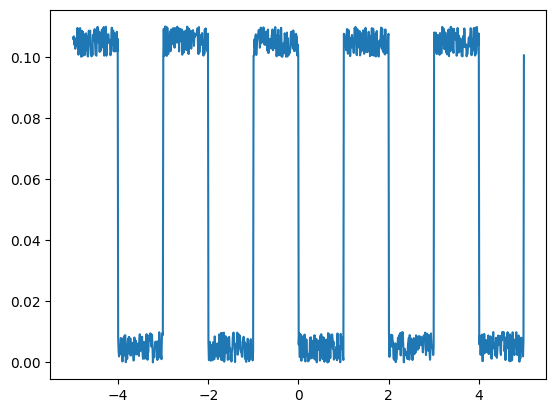

In [28]:
a = -0.0
b=0.1
a=-5
b=5
t, x_impuls = get_impulse(a=a, b=b, period=1, A=0.1, fc=1000, noise=0.01)
#x_impuls=get_cos_singal(f=[150],a=a, b=b, fs=1000, noise=0.5)
plt.plot(t, x_impuls)

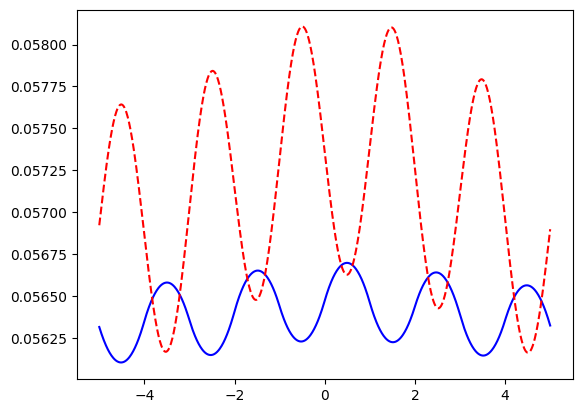

In [29]:
kernel = core_of_gausse(t, 0.8)
filtered_signal_gaus = my_conv(x_impuls, kernel)

window = get_planck(N=len(t), epsilon=0.5)
filtered_signal_planck = my_conv(x_impuls, window)

plt.plot(t, filtered_signal_gaus, '-b')
plt.plot(t, filtered_signal_planck, '--r')

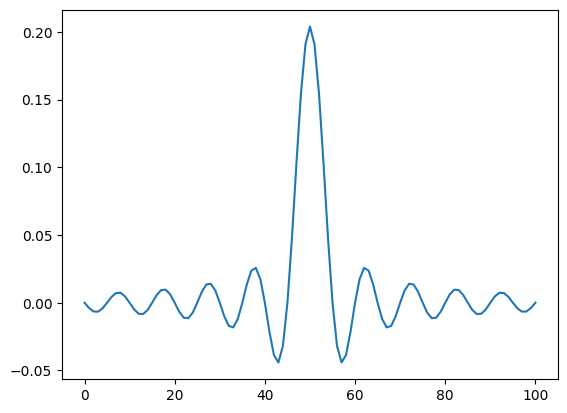

In [90]:
cutoff_freq = 100  # Частота среза фильтра, Гц
num_taps = 101     # Количество коэффициентов фильтра
epsilon = 0.1      # Параметр для окна Планка
ideal_filter = signal.firwin(num_taps, cutoff=cutoff_norm, window='rectangular', pass_zero='lowpass')
plt.plot(ideal_filter)

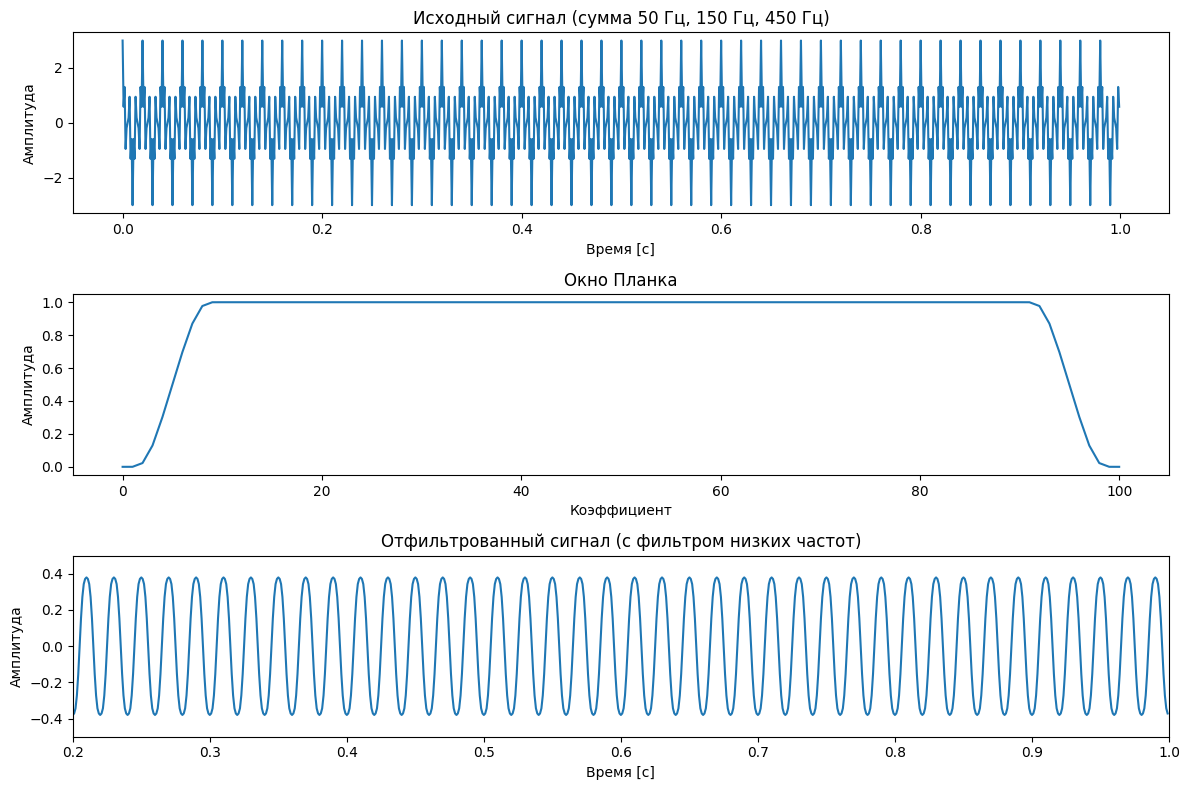

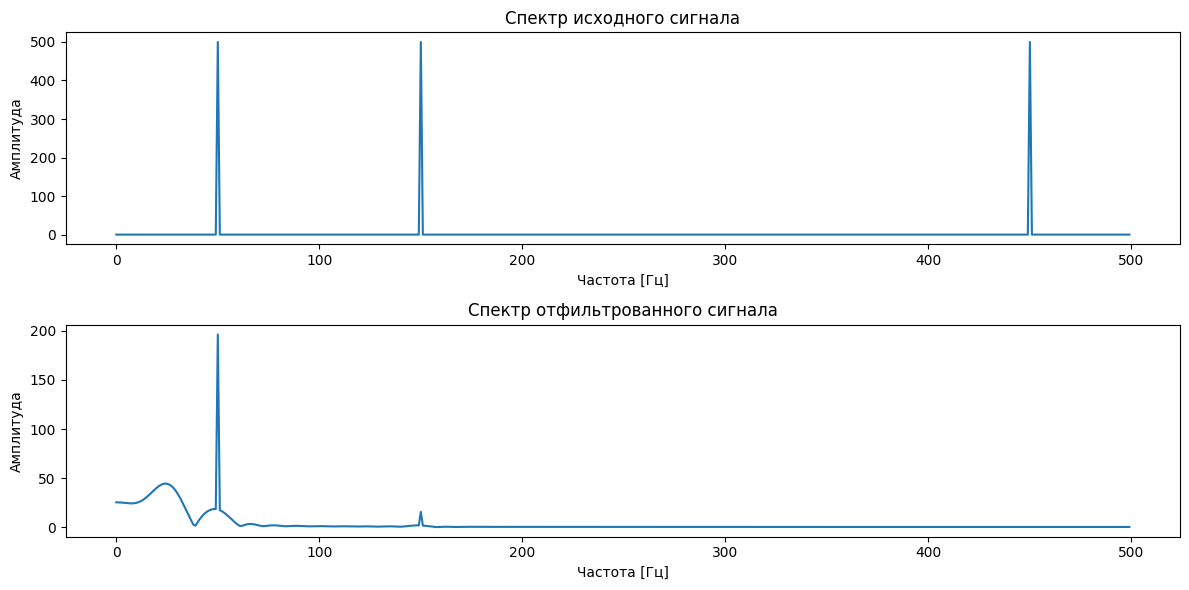

In [94]:
import numpy as np
import scipy.signal as signal
import matplotlib.pyplot as plt

# Функция для генерации окна Планка
def get_planck(N, epsilon):
    a = np.zeros(N)
    for k in range(N):
        if k == 0 or k == N - 1:
            a[k] = 0
        elif 0 < k < epsilon * (N - 1):
            z_a = epsilon * (N - 1) * (1 / k + 1 / (k - epsilon * (N - 1)))
            a[k] = 1 / (np.exp(z_a) + 1)
        elif epsilon * (N - 1) <= k <= (1 - epsilon) * (N - 1):
            a[k] = 1
        elif (1 - epsilon) * (N - 1) < k < N - 1:
            z_b = epsilon * (N - 1) * (1 / (N - 1 - k) + 1 / ((1 - epsilon) * (N - 1) - k))
            a[k] = 1 / (np.exp(z_b) + 1)
    return a

# Параметры сигнала
fs = 1000  # Частота дискретизации, Гц
t = np.linspace(0, 1, fs, endpoint=False)  # Временной вектор (1 секунда)
f1, f2, f3 = 50, 150, 450  # Частоты 50 Гц, 150 Гц, 450 Гц

# Создание сигнала (сумма косинусоид)
signal_in = np.cos(2 * np.pi * f1 * t) + np.cos(2 * np.pi * f2 * t) + np.cos(2 * np.pi * f3 * t)

# Параметры фильтра
num_taps = 101     # Количество коэффициентов фильтра
epsilon = 0.1      # Параметр для окна Планка

# Применение окна Планка как фильтра низких частот
plank_window = get_planck(num_taps, epsilon)

# Сдвигаем окно Планка в частотной области, чтобы сделать его низкочастотным фильтром
low_pass_filter = np.sinc(np.linspace(-np.pi, np.pi, num_taps)) * plank_window

# Фильтрация сигнала с помощью окна Планка
filtered_signal = signal.lfilter(low_pass_filter, 1.0, signal_in)

# Визуализация сигнала до и после фильтрации
plt.figure(figsize=(12, 8))

# Исходный сигнал
plt.subplot(3, 1, 1)
plt.plot(t, signal_in)
plt.title("Исходный сигнал (сумма 50 Гц, 150 Гц, 450 Гц)")
plt.xlabel("Время [с]")
plt.ylabel("Амплитуда")

# Окно Планка (само по себе)
plt.subplot(3, 1, 2)
plt.plot(plank_window)
plt.title("Окно Планка")
plt.xlabel("Коэффициент")
plt.ylabel("Амплитуда")

# Отфильтрованный сигнал
plt.subplot(3, 1, 3)
plt.plot(t, filtered_signal)
plt.title("Отфильтрованный сигнал (с фильтром низких частот)")
plt.xlabel("Время [с]")
plt.xlim(0.2, 1.0)
plt.ylabel("Амплитуда")
plt.ylim(-0.5, 0.5)

plt.tight_layout()
plt.show()

# Построение спектра до и после фильтрации
frequencies_signal = np.fft.fftfreq(len(t), 1/fs)
spectrum_in = np.abs(np.fft.fft(signal_in))
spectrum_filtered = np.abs(np.fft.fft(filtered_signal))

plt.figure(figsize=(12, 6))

# Спектр до фильтрации
plt.subplot(2, 1, 1)
plt.plot(frequencies_signal[:len(t)//2], spectrum_in[:len(t)//2])
plt.title("Спектр исходного сигнала")
plt.xlabel("Частота [Гц]")
plt.ylabel("Амплитуда")

# Спектр после фильтрации
plt.subplot(2, 1, 2)
plt.plot(frequencies_signal[:len(t)//2], spectrum_filtered[:len(t)//2])
plt.title("Спектр отфильтрованного сигнала")
plt.xlabel("Частота [Гц]")
plt.ylabel("Амплитуда")

plt.tight_layout()
plt.show()
